In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [3]:
# Define variables:
signal_name = 'Generated_Doorbell'
filename = './generated_doorbell_center_8M.iq'
samp_rate = 8e6
center_freq = 315e6
# load data into variable - take a second or two for 400MB file
dat = np.fromfile(filename, dtype="complex64")

In [4]:
# what it generally looks like
dat

array([0.       +0.0000000e+00j, 0.       +0.0000000e+00j,
       0.       +0.0000000e+00j, ..., 1.0000024+7.2191946e-09j,
       1.0000024+7.2191946e-09j, 1.0000024+7.2191946e-09j],
      dtype=complex64)

/home/demo/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7585: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


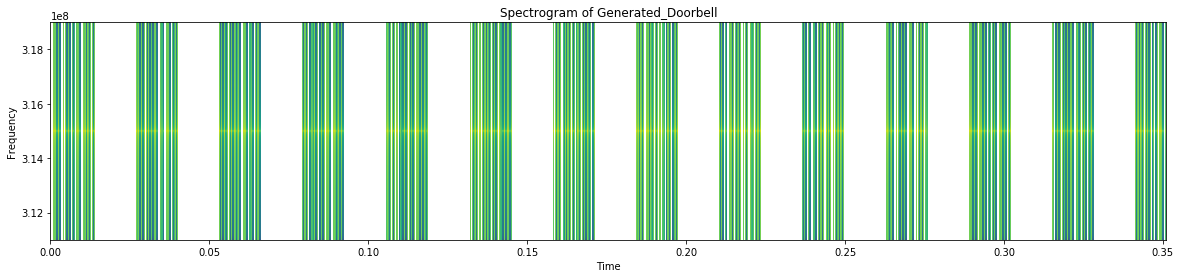

In [5]:
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Spectrogram of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()

In [6]:
# The number of samples divided by sample rate (samps/sec) should give us the sample length (in seconds)
len(dat) / samp_rate

0.351180375

/home/demo/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7585: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


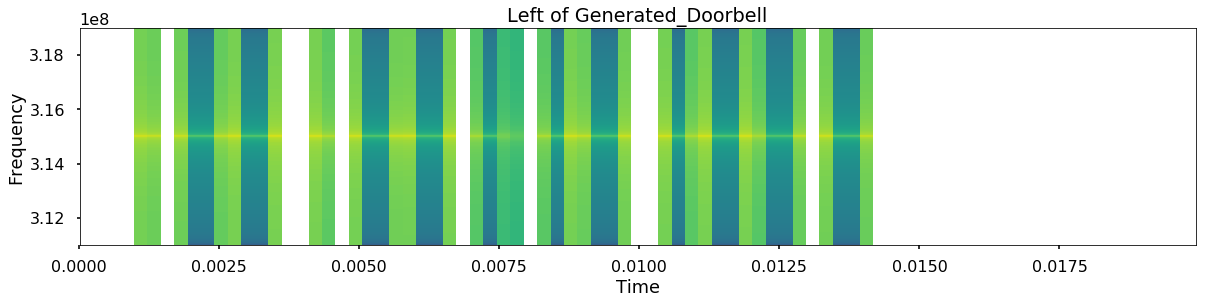

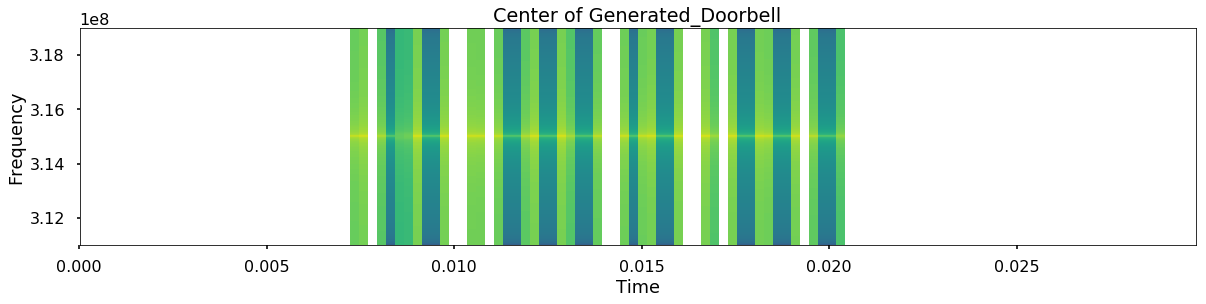

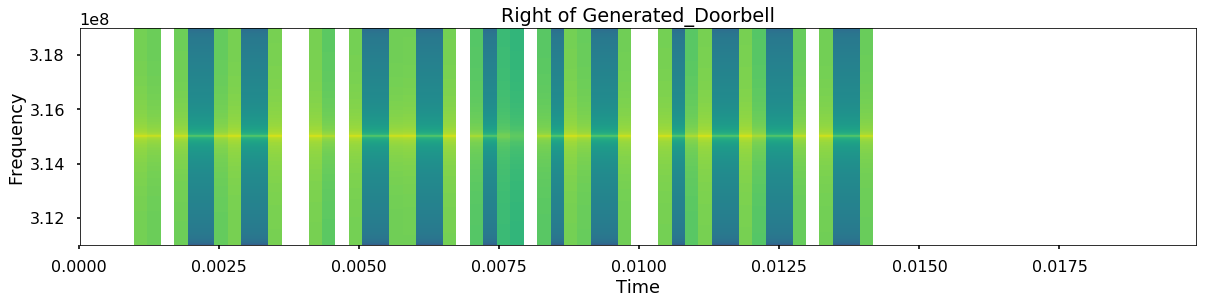

In [8]:
# this also means we can slice this data to predicably 
# concatenate the sample to the part that is interesting, before further processing
left = int(samp_rate*.02)
right = int(samp_rate*.05)
left_dat = dat[:left]
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(left_dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Left of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()
# this also means we can slice this data to predicably 
# concatenate the sample to the part that is interesting, before further processing
cent_dat = dat[left:right]
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(cent_dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Center of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()
# this also means we can slice this data to predicably 
# concatenate the sample to the part that is interesting, before further processing
right_dat = dat[right:]
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(left_dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Right of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()

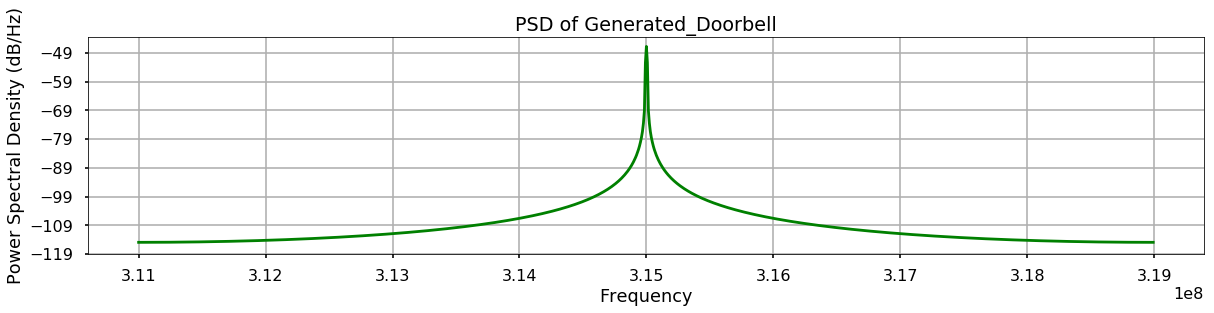

In [9]:
# now the sample is smaller, and it's Power Specrat Density looks like this
plt.figure(figsize=(20,4))
plt.title("PSD of "+signal_name)
plt.psd(cent_dat, NFFT=1024, Fs=samp_rate, Fc=center_freq, color="green")
plt.show()

In [10]:
# now trying to do a low pass filter:
# This eans, the filter affects the outer edges, the center being zer0 -- 
# so lower freqs pass, higher (farther from center) are blocked
f_bw = 100000 # 200k filter for FM 10000 # fileter bandwidth
Fs  = samp_rate # sample_rate
n_taps = 64   # taps?
lpf = signal.remez(n_taps, [0, f_bw, f_bw+(Fs/2-f_bw)/4, Fs/2], [1,0], Hz=Fs)
y = signal.lfilter(lpf, 1.0, cent_dat)

/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


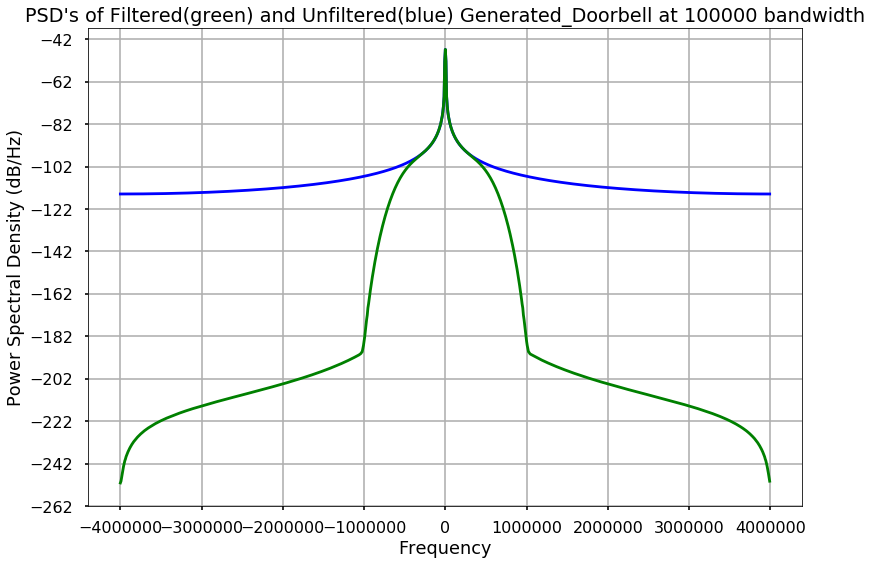

In [11]:
plt.psd(cent_dat, NFFT=1024, Fs=samp_rate, color="blue")  # original
plt.psd(y, NFFT=1024, Fs=samp_rate, color="green")  # filtered
plt.title("PSD's of Filtered(green) and Unfiltered(blue) " + signal_name + " at " + str(f_bw) + " bandwidth")
plt.show() 


/home/demo/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7585: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


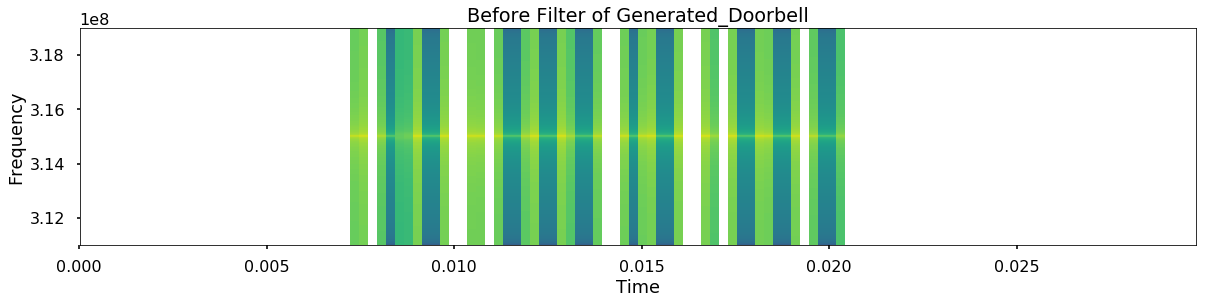

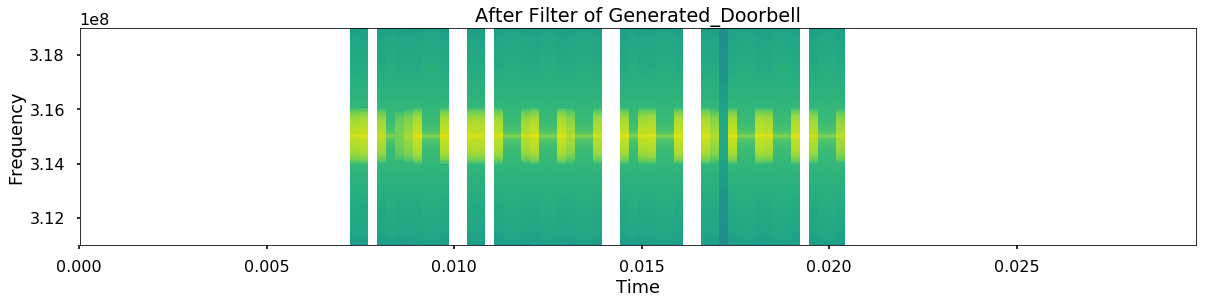

In [12]:
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(cent_dat, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("Before Filter of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()
# Spectrogram
plt.figure(figsize=(20,4))
plt.specgram(y, NFFT=2048, Fs=samp_rate, Fc=center_freq)
plt.title("After Filter of "+signal_name)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.style.use('seaborn-poster')
# uncomment below to save figure as .jpg, pdf, etc
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show()

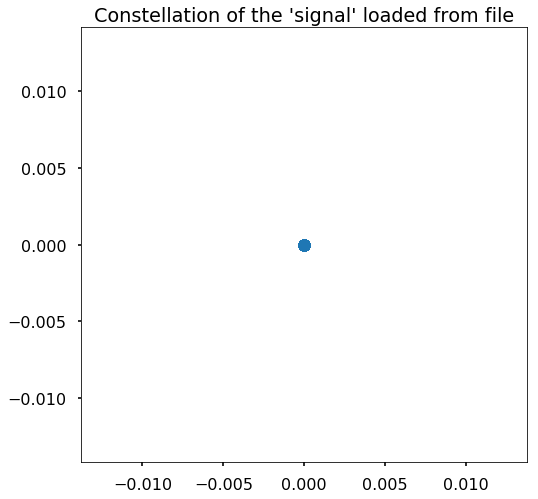

In [13]:
# And let's look at it on the complex plane (constellation)
# Note that showing *every* data point would be time- and processing-intensive
# so we'll just show a few
plt.figure(figsize=(8,8))
plt.scatter(np.real(y[200000:300000]), np.imag(y[200000:300000]))
plt.title("Constellation of the 'signal' loaded from file")
#plt.savefig(signal_name+"_spectrogram.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show() 

In [14]:
# push the filtered and sliced sampels back out to a file
y.tofile(filename+'.cut.filtered.iq')
cent_dat.tofile(filename+'.cut.iq')

In [15]:
# Post GNURadio processing --- call a seperate script?
# Define variables:
signal_name = 'gen_Doorbell.sliced'
filename = './gen_Doorbell.sliced'
samp_rate = 2e5
center_freq = 315e6
# load data into variable - take a second or two for 400MB file
dat = np.fromfile(filename, dtype="float32")

In [16]:
dat

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

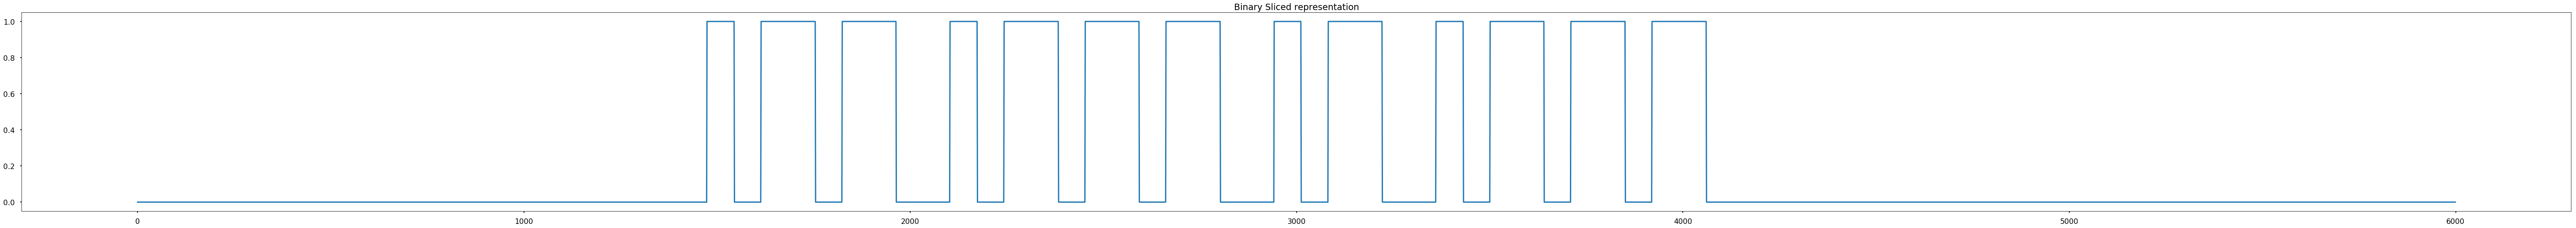

In [18]:
# the x axis will be each value --
lefty = 0
righty = lefty+len(dat)
x = range(len(dat[lefty:righty]))
# the y axis is dat 
plt.figure(figsize=(100,8))
#plt.scatter(x,dat[lefty:righty])
plt.plot(x,dat[lefty:righty])
plt.title("Binary Sliced representation")
plt.savefig(signal_name+"_sliced-check.jpg", bbox_inches='tight', pad_inches=0.5)
plt.show() 

/mnt/hgfs/share/SDRLabs/sdr-labs-robodojo


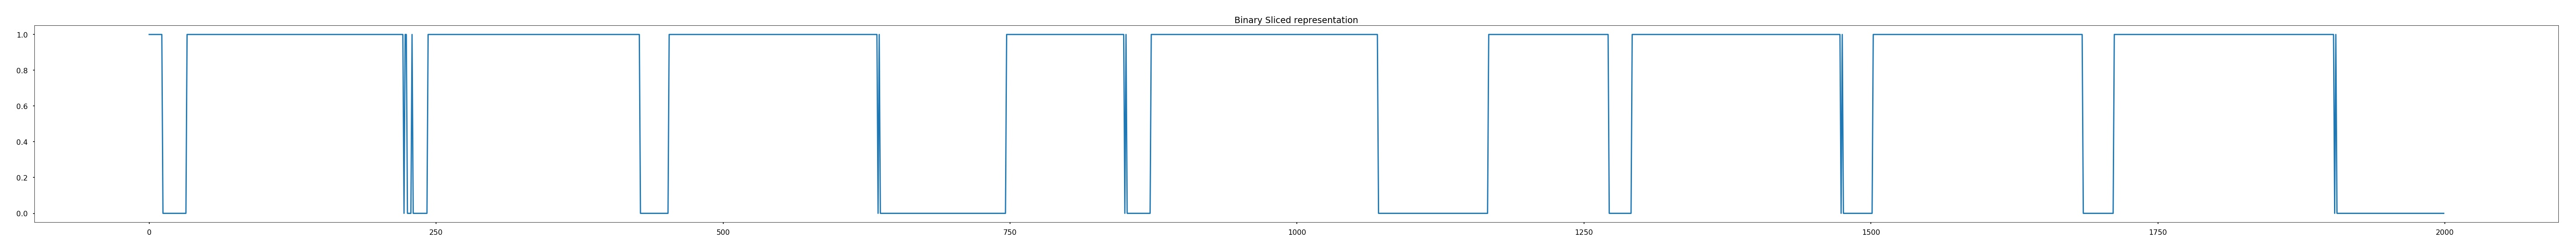

In [45]:
from IPython.display import Image
Image(filename="./Doorbell_sliced_sliced.jpg")